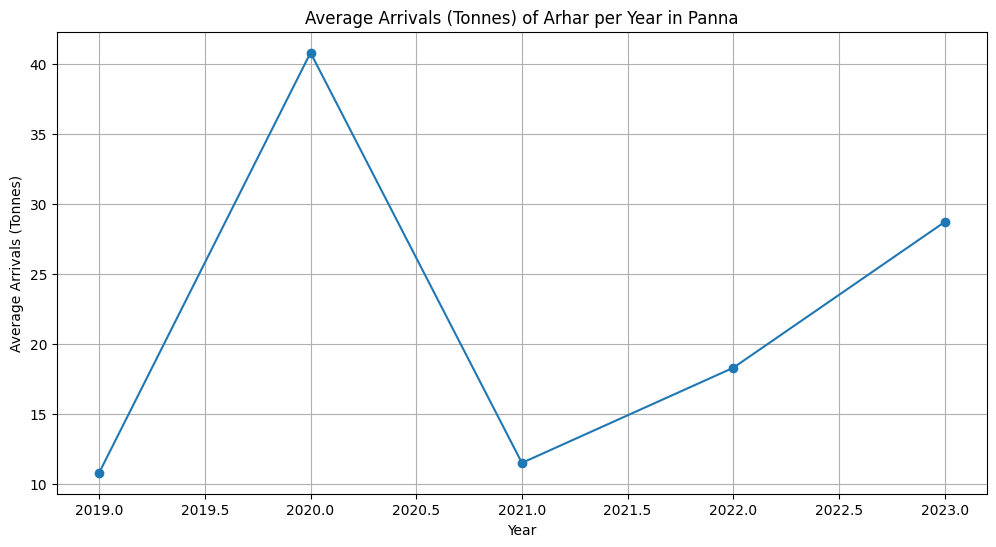

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Arhar 2019-2023.csv")
df = df[df["District Name"] == 'Panna']
df['Reported Date'] = pd.to_datetime(df['Reported Date'], format='%d-%b-%y')
df['Year'] = df['Reported Date'].dt.year
df['Arrivals (Tonnes)'] = pd.to_numeric(df['Arrivals (Tonnes)'], errors='coerce')
year_group = df.groupby("Year")
yearly_avg_arrivals = year_group['Arrivals (Tonnes)'].mean()
plt.figure(figsize=(12, 6))
plt.plot(yearly_avg_arrivals.index, yearly_avg_arrivals.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Average Arrivals (Tonnes)')
plt.title('Average Arrivals (Tonnes) of Arhar per Year in Panna')
plt.grid(True)
plt.show()


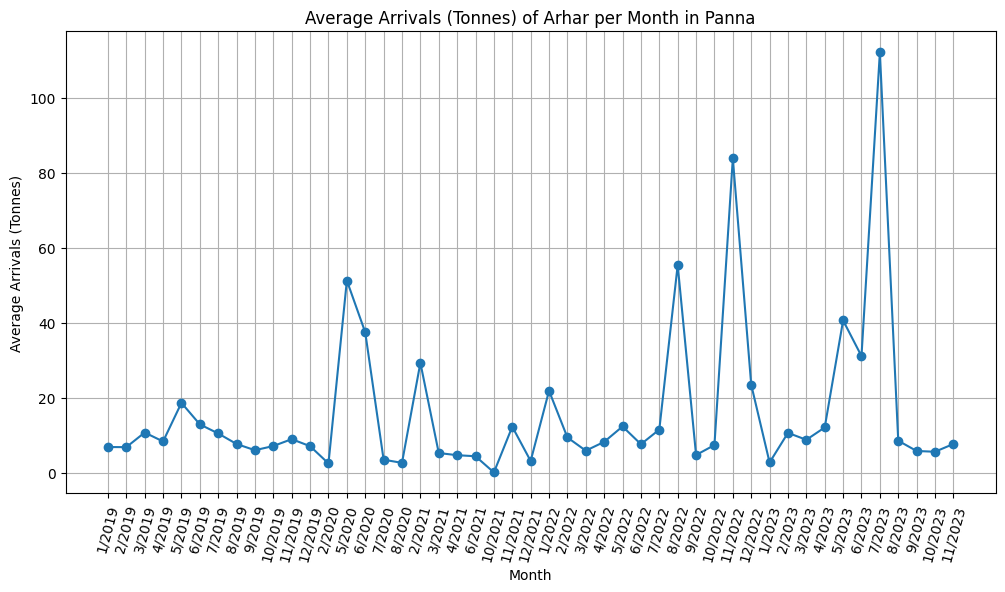

In [74]:
df['Month'] = df['Reported Date'].dt.month
monthly_group = df.groupby(["Year", "Month"])
monthly_avg_arrivals = monthly_group['Arrivals (Tonnes)'].mean()
months = [f"{month}/{year}" for year, month in monthly_avg_arrivals.index]
plt.figure(figsize=(12, 6))
plt.plot(months, monthly_avg_arrivals.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Average Arrivals (Tonnes)')
plt.title('Average Arrivals (Tonnes) of Arhar per Month in Panna')
plt.xticks(rotation=75) 
plt.grid(True)
plt.show()

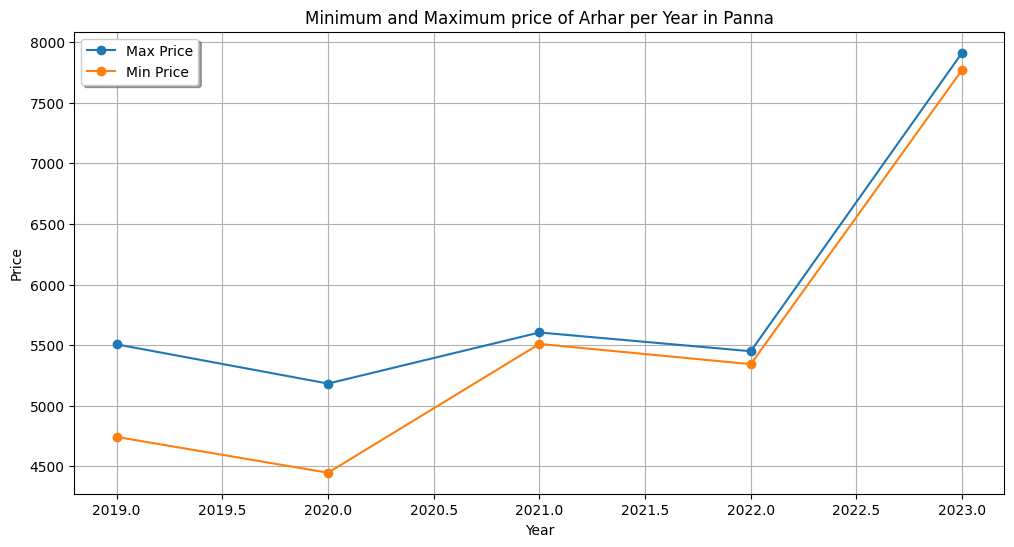

In [75]:
df['Min Price (Rs./Quintal)'] = pd.to_numeric(df['Min Price (Rs./Quintal)'], errors='coerce')
df['Max Price (Rs./Quintal)'] = pd.to_numeric(df['Max Price (Rs./Quintal)'], errors='coerce')
yearly_avg_min_price = year_group['Min Price (Rs./Quintal)'].mean()
yearly_avg_max_price = year_group['Max Price (Rs./Quintal)'].mean()
plt.figure(figsize=(12, 6))
plt.plot(yearly_avg_max_price.index, yearly_avg_max_price.values, marker='o', label='Max Price')
plt.plot(yearly_avg_min_price.index, yearly_avg_min_price.values, marker='o', label='Min Price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Minimum and Maximum price of Arhar per Year in Panna')
plt.legend(loc="best", shadow=True, fontsize="medium")
plt.grid(True)
plt.show()

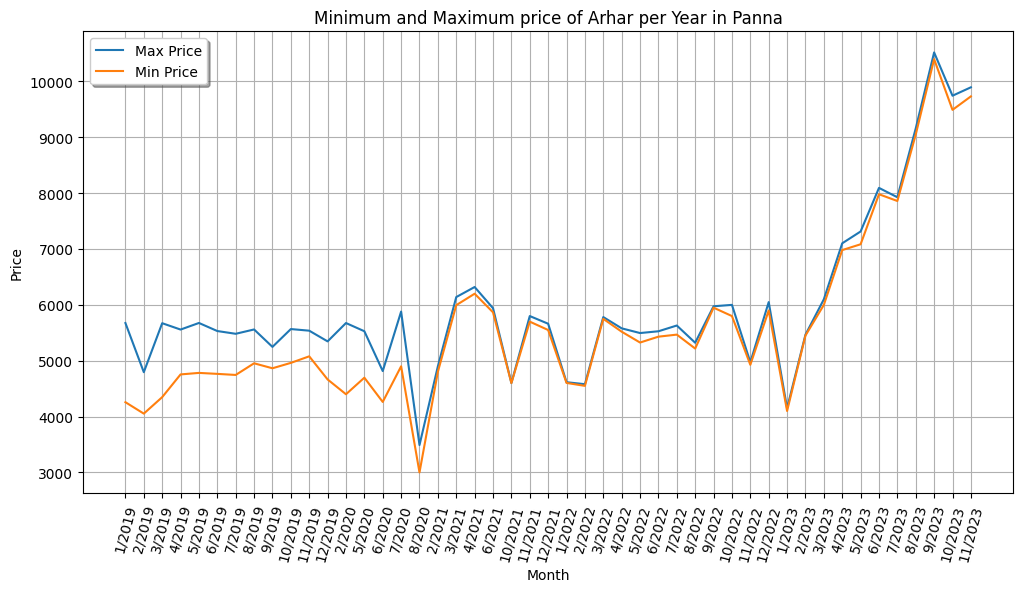

In [82]:
monthly_avg_min_price = monthly_group['Min Price (Rs./Quintal)'].mean()
monthly_avg_max_price = monthly_group['Max Price (Rs./Quintal)'].mean()
months = [f"{month}/{year}" for year, month in monthly_avg_min_price.index]
plt.figure(figsize=(12, 6))
plt.plot(months, monthly_avg_max_price.values, label='Max Price')
plt.plot(months, monthly_avg_min_price.values, label='Min Price')
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('Minimum and Maximum price of Arhar per Year in Panna')
plt.xticks(rotation=75) 
plt.legend(loc="best", shadow=True, fontsize="medium")
plt.grid(True)
plt.show()

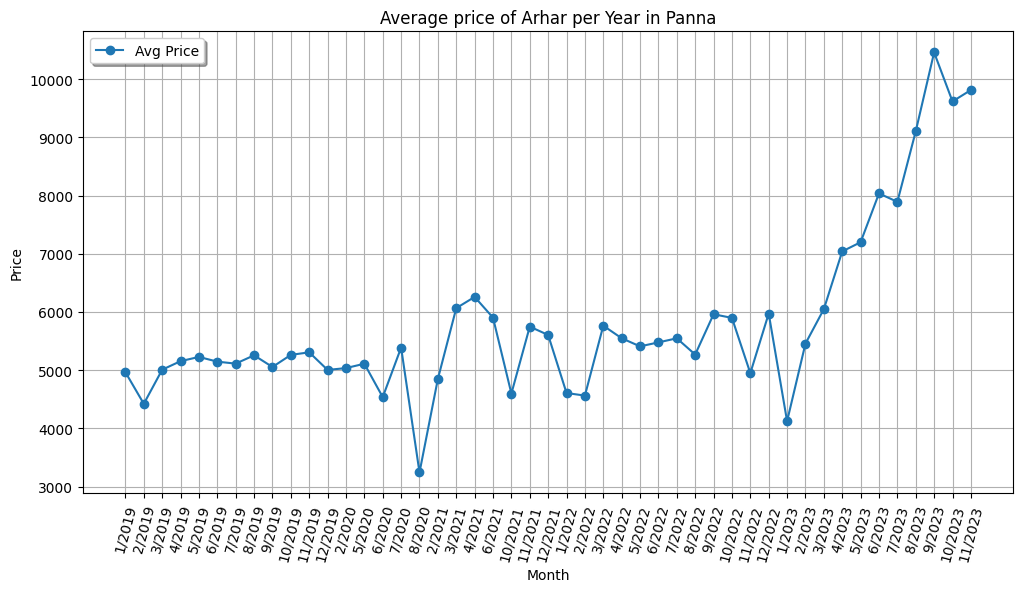

In [77]:
monthly_avg_price = (monthly_avg_min_price + monthly_avg_max_price) / 2
months = [f"{month}/{year}" for year, month in monthly_avg_min_price.index]
plt.figure(figsize=(12, 6))
plt.plot(months, monthly_avg_price.values, marker='o', label='Avg Price')
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('Average price of Arhar per Year in Panna')
plt.xticks(rotation=75) 
plt.legend(loc="best", shadow=True, fontsize="medium")
plt.grid(True)
plt.show()

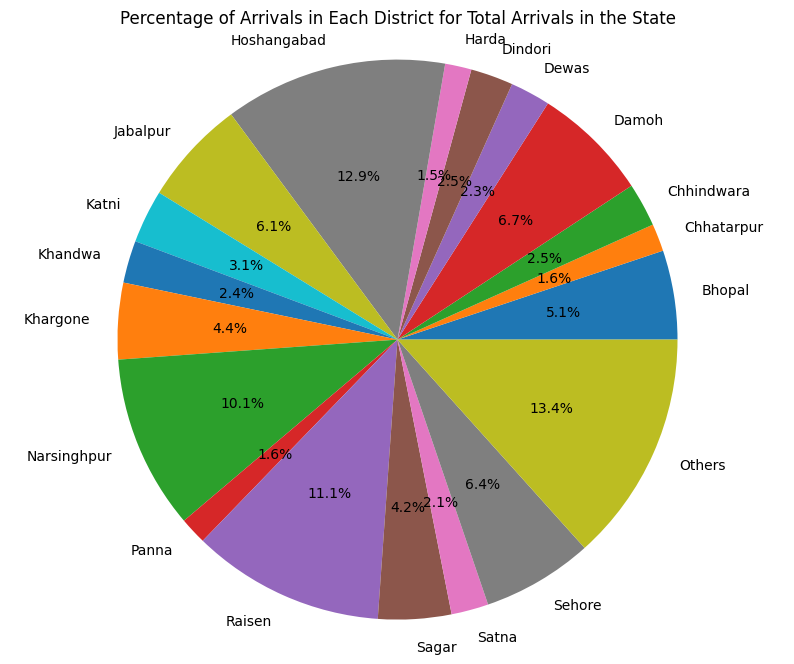

In [102]:
df = pd.read_csv("Arhar 2019-2023.csv")
district_group = df.groupby("District Name")
df['Arrivals (Tonnes)'] = pd.to_numeric(df['Arrivals (Tonnes)'], errors='coerce')
district_arrivals = district_group["Arrivals (Tonnes)"].sum()
total_arrivals_state = district_arrivals.sum()
district_percentage = (district_arrivals / total_arrivals_state) * 100
threshold = 1.5
district_percentage['Others'] = district_percentage[district_percentage < threshold].sum()
district_percentage = district_percentage[district_percentage >= threshold]
plt.figure(figsize=(10, 8))
plt.pie(district_percentage, labels=district_percentage.index,  autopct='%1.1f%%', radius=4)
plt.title('Percentage of Arrivals in Each District for Total Arrivals in the State')
plt.axis('equal') 
plt.show()